# S9767

In [1]:
%load_ext autoreload
%autoreload 2
%run ../draw_functions.py
%run ../kstest.py

In [2]:
from draw_functions import *
from kstest import *

In [10]:
#read csv
df = pd.read_csv('../csv/MX124052564601.csv')

#ajout du slope
df['slope'] = df.groupby('ResultCurve_id').apply(lambda group: group['xvalue'].diff() / group['xtime'].diff(), include_groups=False).reset_index(level=0, drop=True)
df_02_08 = df[(df['xtime'] >= 0.2) & (df['xtime'] <= 0.8)]
df_035_065 = df[(df['xtime'] >= 0.35) & (df['xtime'] <= 0.65)]
df

,ResultCurve_id,xtime,xvalue,Batch,Sample_Code,slope
0,EBD4DD8A-8607-4B5E-BBFB-041D02E509EE,0.013333,2.101521,061302D,O4O13SG77,NaN
1,EBD4DD8A-8607-4B5E-BBFB-041D02E509EE,0.023333,2.587357,061302D,O4O13SG77,48.583552
2,EBD4DD8A-8607-4B5E-BBFB-041D02E509EE,0.033333,2.677745,061302D,O4O13SG77,9.038800
3,EBD4DD8A-8607-4B5E-BBFB-041D02E509EE,0.043333,2.689043,061302D,O4O13SG77,1.129850
4,EBD4DD8A-8607-4B5E-BBFB-041D02E509EE,0.047867,2.663433,061302D,O4O13SG77,-5.649250
...,...,...,...,...,...,...
739,2ACA92C7-5FED-4CCA-80EA-F9E7400C1F81,1.054533,10.359670,060901D,O4O13SB84,2.259700
740,2ACA92C7-5FED-4CCA-80EA-F9E7400C1F81,1.102467,10.479284,060901D,O4O13SB84,2.495413
741,2ACA92C7-5FED-4CCA-80EA-F9E7400C1F81,1.130000,10.541501,060901D,O4O13SB84,2.259700
742,2ACA92C7-5FED-4CCA-80EA-F9E7400C1F81,1.150400,10.576300,060901D,O4O13SB84,1.705852


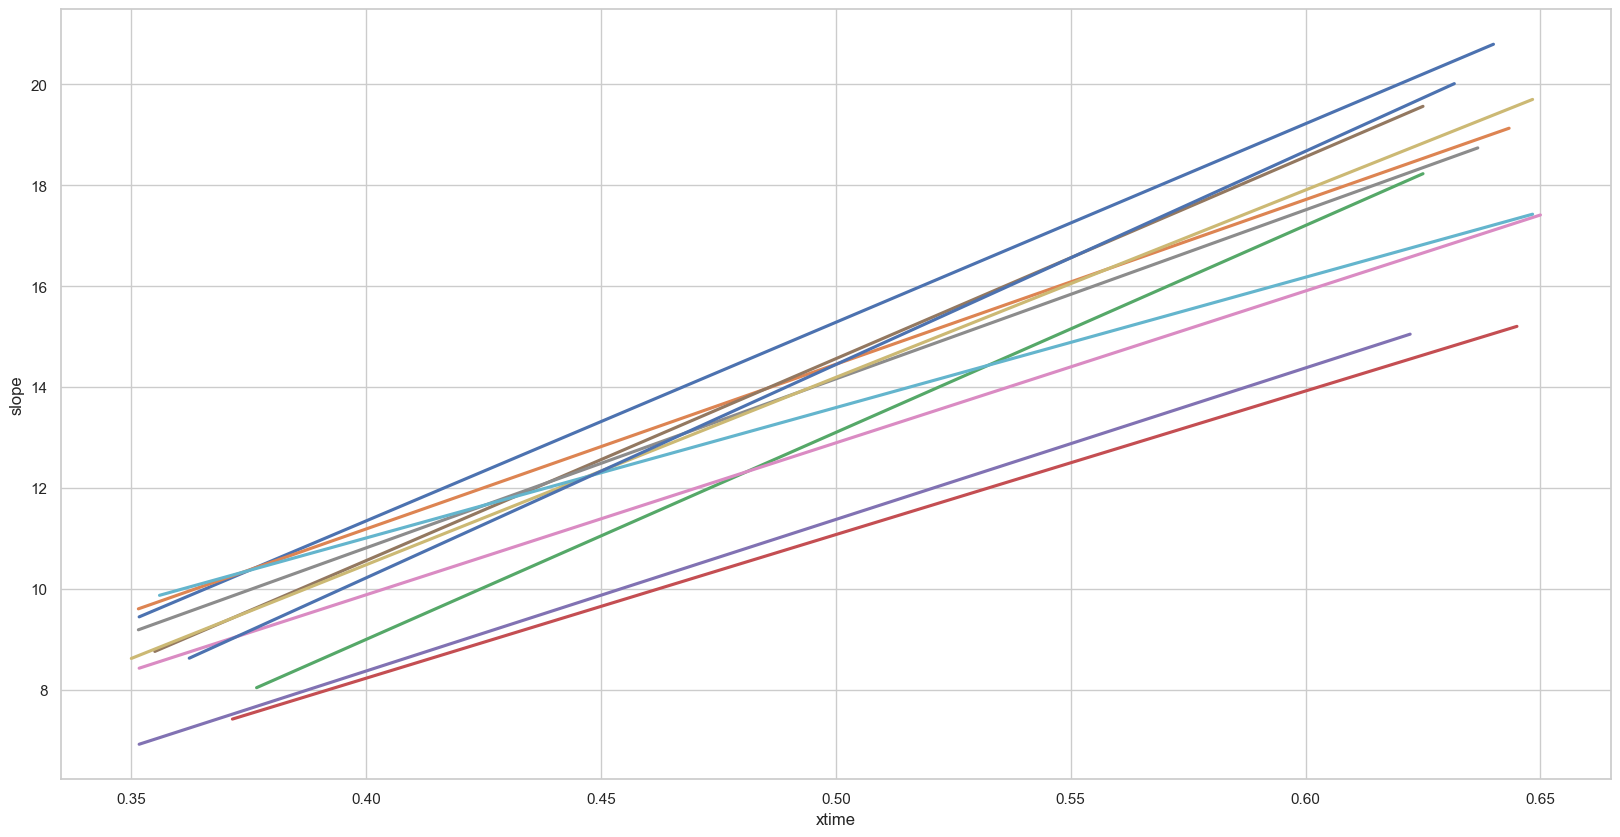

In [14]:
dessiner_commande_slope(df_035_065,1, unified=False)

## Analyse des pentes

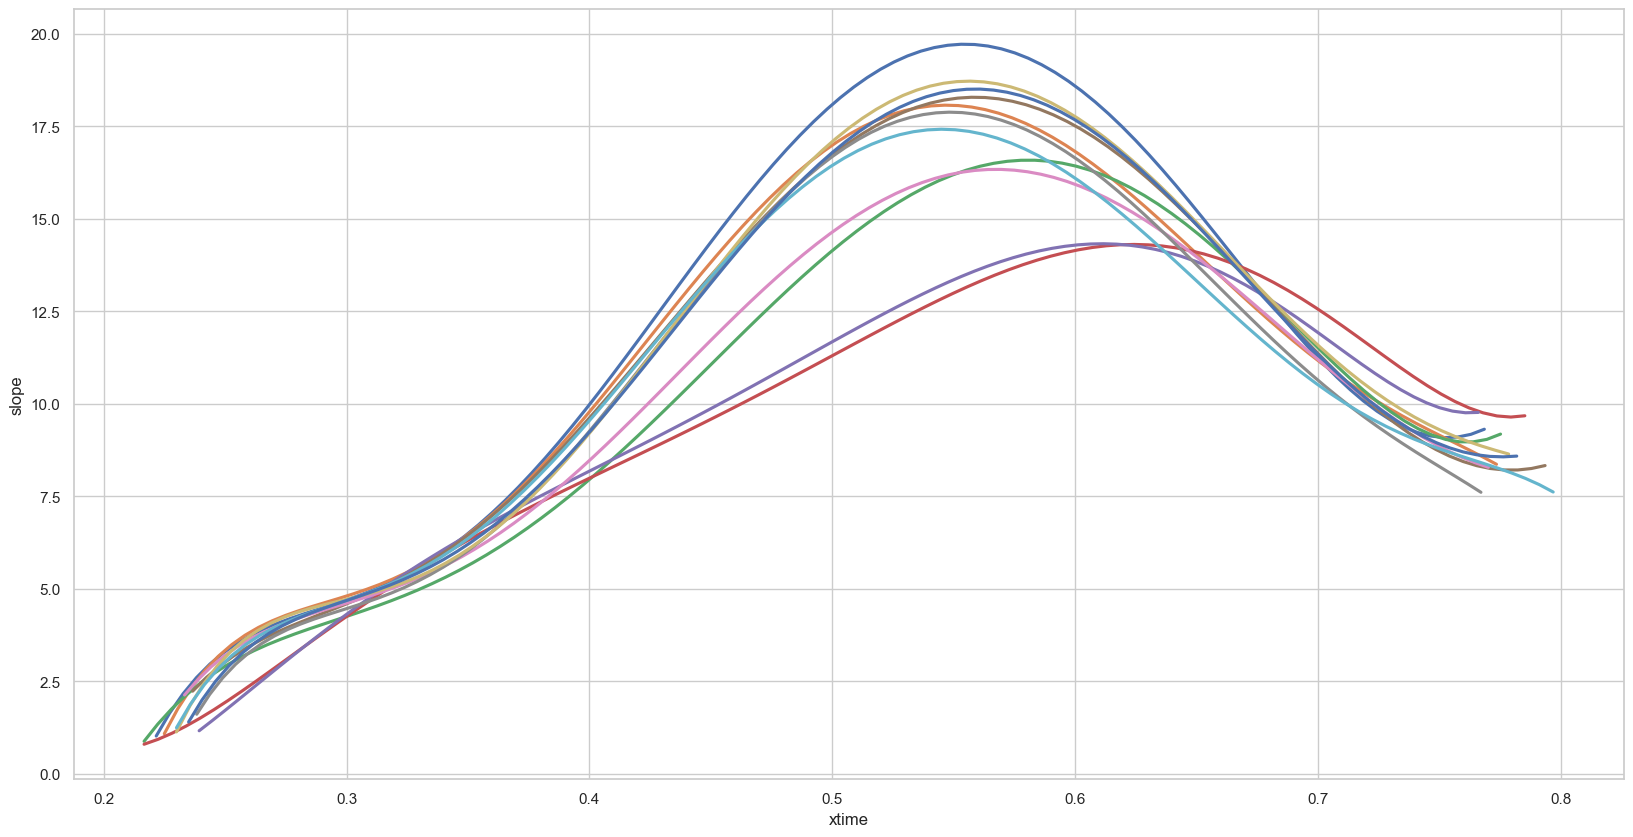

In [9]:
dessiner_commande_slope(df_02_08, 6 ,unified=False)

## Test Type

- Batch 145807B: 134.45161649263727
- Batch 154412B: 128.67699677512618
- Batch 153110B: 100.59212419649602
- Batch 153911B: 92.12593914549257
- Batch 154913B: 59.54056976144513
- Batch 151208B: 50.68743565619879
- Batch 145206B: 40.99592978156963
- Batch 144305B: 40.49146368953352
- Batch 152209B: 14.602526197142154


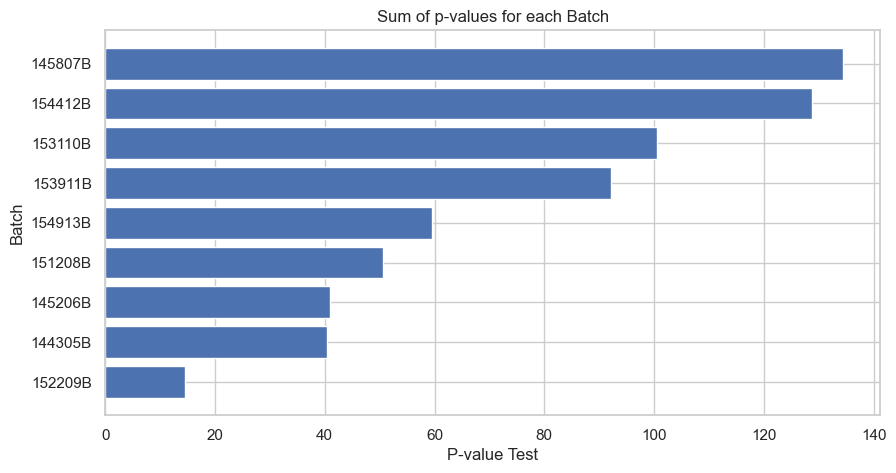

In [60]:
batch_pvalues = ks_batch_test_type_value(df, 12, ptype)

visualiser_batch_pvalue(batch_pvalues, log=True)

- Batch 153911B: 15.017104206877237
- Batch 153110B: 12.545202628603477
- Batch 145206B: 7.562876047971923
- Batch 152209B: 6.85844983483722
- Batch 151208B: 6.2111080677588895
- Batch 154412B: 4.40081655264441
- Batch 145807B: 4.201897199729622
- Batch 154913B: 3.659433705535686
- Batch 144305B: 2.3659084854219423


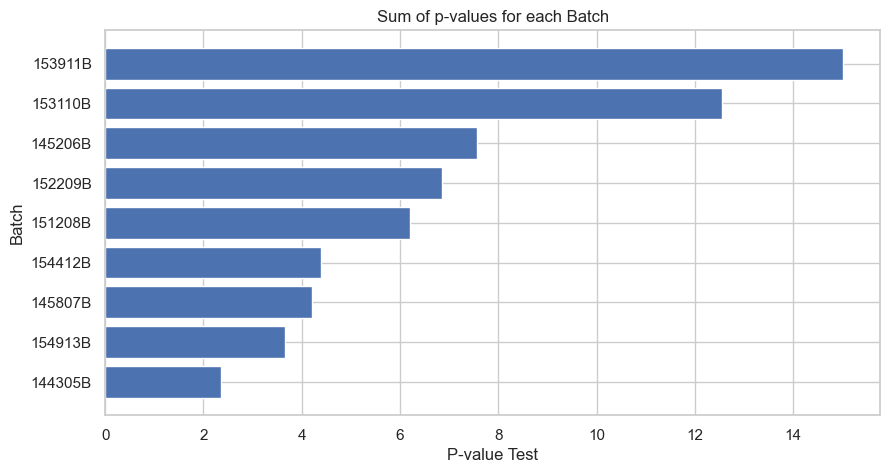

In [61]:
batch_pvalues = ks_batch_test_type_slope(df, 12, pslope_type)

visualiser_batch_pvalue(batch_pvalues, log=True)

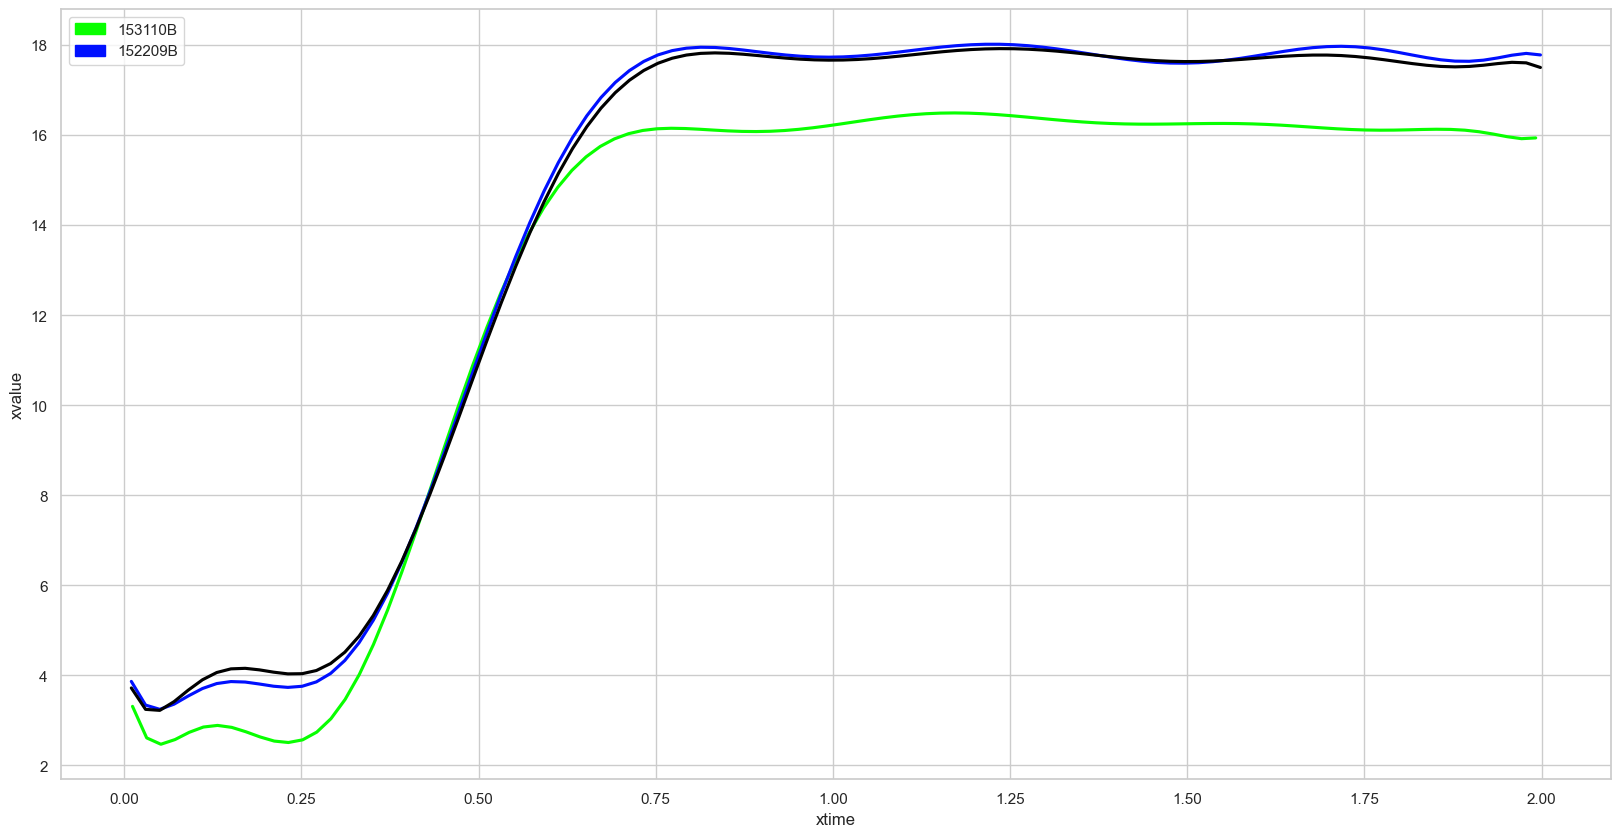

In [35]:
dessiner_batchs(df, ['153110B', '152209B'], 12, unified=True, c_type=True)

In [5]:
# Trouver le xtime correspondant au max de la pente pour chaque groupe
max_slope_sample_xtime = df_02_08.loc[df_02_08.groupby('Sample_Code')['slope'].idxmax()][['Batch', 'xtime']].set_index('Batch')['xtime']
max_slope_batch_xtime = max_slope_sample_xtime.groupby('Batch').median()

# Calculer la médiane de xtime pour chaque groupe
median_xtime = max_slope_sample_xtime.median()

# Calculer la différence entre le xtime du max de la pente et la médiane de xtime pour chaque groupe
diff = max_slope_batch_xtime - 0.5255642654166667

# Sort the differences by their absolute values in descending order
diff_sorted = diff.abs().sort_values(ascending=False)

# Print the differences in the sorted order
for batch in diff_sorted.index:
    print(f"La différence de temps entre le max de la pente et la médiane pour le batch {batch} est : {round(diff_sorted[batch]*60,3)} seconde")

La différence de temps entre le max de la pente et la médiane pour le batch 153110B est : 3.64 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 153911B est : 3.625 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 154412B est : 2.216 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 154913B est : 1.968 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 145206B est : 1.934 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 145807B est : 1.824 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 151208B est : 1.746 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 144305B est : 1.491 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 152209B est : 0.971 seconde


In [6]:
round(np.std(max_slope_batch_xtime)*1000,2)

37.99

In [8]:
round(np.std(max_slope_sample_xtime)*1000,2)

40.62

In [19]:
max_slope_sample_xtime

Batch
144305B    0.503085
144305B    0.498333
145807B    0.559533
145807B    0.515667
145807B    0.558600
145807B    0.553333
151208B    0.557667
151208B    0.571667
151208B    0.495736
151208B    0.551667
152209B    0.513750
152209B    0.520000
152209B    0.505000
152209B    0.466467
153110B    0.464896
153110B    0.478000
153110B    0.451667
153911B    0.441667
153911B    0.465142
153911B    0.559067
154412B    0.553333
154412B    0.563333
154412B    0.561667
154412B    0.570000
154913B    0.557200
154913B    0.559533
145206B    0.493333
145206B    0.482065
145206B    0.479600
145206B    0.566667
145206B    0.555000
Name: xtime, dtype: float64

In [20]:
df_04_08 = df[(df['xtime'] > 0.4) & (df['xtime'] < 0.8)]

In [21]:
df_04_08

,ResultCurve_id,xtime,xvalue,Batch,Sample_Code,slope
24,EA0523F3-DA71-4312-8BA7-59DEE641D35E,0.401667,7.084160,151208B,M1719PSD6,23.726851
25,EA0523F3-DA71-4312-8BA7-59DEE641D35E,0.411667,7.344025,151208B,M1719PSD6,25.986551
26,EA0523F3-DA71-4312-8BA7-59DEE641D35E,0.421667,7.637786,151208B,M1719PSD6,29.376101
27,EA0523F3-DA71-4312-8BA7-59DEE641D35E,0.431667,7.954144,151208B,M1719PSD6,31.635801
28,EA0523F3-DA71-4312-8BA7-59DEE641D35E,0.441667,8.281801,151208B,M1719PSD6,32.765651
...,...,...,...,...,...,...
3259,A1DB47D8-1CB3-4FB6-BAFB-F4AEB0C3F1CA,0.691667,16.484512,154412B,M1719Q0O6,18.077601
3260,A1DB47D8-1CB3-4FB6-BAFB-F4AEB0C3F1CA,0.717000,16.804636,154412B,M1719Q0O6,12.636481
3261,A1DB47D8-1CB3-4FB6-BAFB-F4AEB0C3F1CA,0.721667,16.857363,154412B,M1719Q0O6,11.298501
3262,A1DB47D8-1CB3-4FB6-BAFB-F4AEB0C3F1CA,0.761667,17.218915,154412B,M1719Q0O6,9.038800


In [23]:
for sample in df_04_08['Sample_Code'].unique():
    df_sample = df_04_08[df_04_08['Sample_Code'] == sample]

    z1 = np.polyfit(df_sample['xtime'], df_sample['slope'], 6)
    p1 = np.poly1d(z1)

    # Update the 'fitted_slope' in df_data for the current sample
    df_04_08.loc[df_04_08['Sample_Code'] == sample, 'fitted_slope'] = p1(df_sample['xtime'])

# I want a new dataframe with three columns: OrderNo, std_dev_batch, std_dev_sample
df_std_dev = pd.DataFrame(columns=['std_dev_batch', 'std_dev_sample'])

max_slope_sample_xtime = df_04_08.loc[df_04_08.groupby('Sample_Code')['fitted_slope'].idxmax()][['Batch', 'xtime']].set_index('Batch')['xtime']
max_slope_batch_xtime = max_slope_sample_xtime.groupby('Batch').median()

std_dev_batch = round(np.std(max_slope_batch_xtime) * 1000, 2)
std_dev_sample = round(np.std(max_slope_sample_xtime) * 1000, 2)

df_std_dev.loc[len(df_std_dev)] = [std_dev_batch, std_dev_sample]


In [24]:
df_std_dev

,std_dev_batch,std_dev_sample
0,31.71,35.69
